<a href="https://colab.research.google.com/github/sophieceeplusplus/arch-GIS/blob/master/Gabii_Jewellery_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
!pip install fiona
!pip install geopandas
import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets

In [0]:
url = 'http://ropitz.github.io/digitalantiquity/data/gabii_SU.geojson'
request = requests.get(url)
b = bytes(request.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gabii_su_poly = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gabii_su_poly.head())

                                            geometry  ...  Shape_Area
0  POLYGON Z ((1415906.023 5144201.194 64.774, 14...  ...    0.030028
1  POLYGON Z ((1415940.483 5144159.515 62.910, 14...  ...    0.567181
2  POLYGON Z ((1415956.547 5144171.764 62.566, 14...  ...    0.030045
3  POLYGON Z ((1415955.891 5144171.889 62.624, 14...  ...    0.030902
4  POLYGON Z ((1415956.267 5144171.289 62.618, 14...  ...    0.170833

[5 rows x 6 columns]


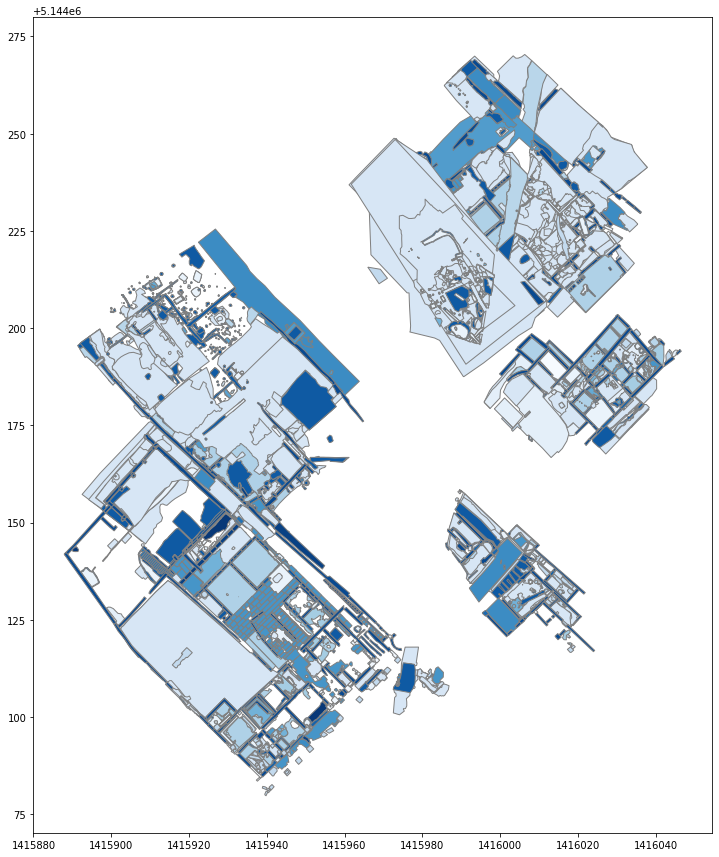

In [0]:
gabii_map1 = gabii_su_poly.plot(column='DESCRIPTIO', cmap='Blues', edgecolor='grey', figsize=(15, 15));

In [0]:
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN
...,...,...,...,...
2639,8365,2749,Bronze hair pin,Pin
2640,8365,2751,Lead Weight,Metal Object
2641,8365,2758,african red slip fragment with a moulded face.,Ceramic Fragment
2642,8375,2720,Iron blade,Blade


In [0]:
sf_su_desc = sf_su['SF_OBJECT_TYPE']
set(sf_su_desc)

{' Area B',
 ' Area H"',
 ' along with a crescent (maybe a boat?). Weight 1.370 kg. Large fragment of buff colored tile with red inclusions. Photo model completed by Thomas Kocjan during the AAR Digital Documentation session in 2017."',
 ' given its characteristic fabric and bulging toe. Situated just above the toe is an upside-down gamma-shaped incision (appears like a backwards L with toe pointed downwards). Peacock & Williams (1986) pp. 155-157 place the production dates of these amphora between the late second century and late fourth century AD (which fits with other material from SU)."',
 ' hole drilled in break"',
 ' indicating that the stamp was produced in the year of the consuls Apronianus and Paetinus in 123 CE. The lower line reads ""*EV" likely indicating the name of the workshop"',
 ' possibly the bulk excavated section from which other chain pieces were microexcavated. "',
 ' the conservator (check?)) with cylindrical silver/bronze beads inside. ',
 ' topo point taken.',


In [0]:
types = ['Ring','Bracelet','Pendant']
jewellery = sf_su.loc[sf_su['SF_OBJECT_TYPE'].isin(types)]
jewellery

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
16,0,318,ring,Ring
30,0,426,ring,Ring
44,0,706,ring,Ring
51,0,763,ring,Ring
83,0,1164,Silver (?) ring,Ring
...,...,...,...,...
2252,7218,2761,Ring fragment,Ring
2297,8000,1708,Bronze ring,Ring
2502,8146,2218,Circular bronze object - ring shaped,Ring
2584,8202,2469,Iron bracelet with circular center,Bracelet


In [0]:
pd.value_counts(jewellery['SU'].values, sort=True)

0       6
7180    4
2817    4
2534    3
3372    2
       ..
3526    1
5573    1
2756    1
3581    1
3267    1
Length: 71, dtype: int64

In [0]:
gabii_jewellery = gabii_su_poly.merge(jewellery, on='SU')
gabii_jewellery.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,"POLYGON Z ((1415941.992 5144161.561 62.386, 14...",13,DEP,1376,5.688700,1.566456,297,ring,Ring
1,"POLYGON Z ((1416009.809 5144217.073 61.273, 14...",219,DEP,2226,15.263443,8.156530,311,ring,Ring
2,"POLYGON Z ((1415945.297 5144171.076 63.101, 14...",527,DEP,1032,125.724523,483.921473,51,ring,Ring
3,"POLYGON Z ((1415933.560 5144188.193 63.640, 14...",697,FILL,1110,7.524746,2.720855,113,ring,Ring
4,"POLYGON Z ((1415908.120 5144179.273 65.015, 14...",969,DEP,380,11.285266,5.933908,108,ring,Ring


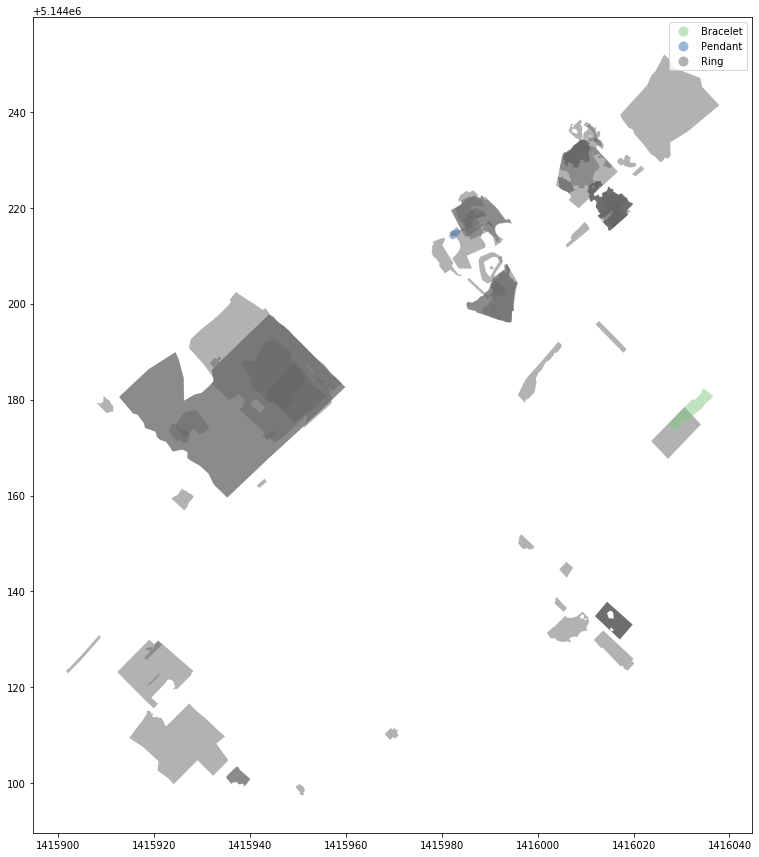

In [0]:
gabii_jewellery.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [0]:
gabii_jewellery.sort_values(by=['Shape_Area'],ascending=False)

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
9,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,69,ring,Ring
10,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,128,ring,Ring
2,"POLYGON Z ((1415945.297 5144171.076 63.101, 14...",527,DEP,1032,125.724523,483.921473,51,ring,Ring
11,"POLYGON Z ((1416017.249 5144239.390 61.415, 14...",1916,DEP,4020,64.057271,224.000624,388,ring,Ring
37,"POLYGON Z ((1415930.743 5144113.583 60.336, 14...",4169,DEP,5598,67.465304,186.385074,1323,Bronze ring,Ring
...,...,...,...,...,...,...,...,...,...
30,"POLYGON Z ((1415982.688 5144214.230 60.000, 14...",3721,SF,3382,0.224586,0.002906,1144,bracelet,Bracelet
29,"POLYGON Z ((1415982.707 5144214.359 60.000, 14...",3711,SF,3372,0.122740,0.001004,2493,"T.51, bronze suspension ring",Ring
28,"POLYGON Z ((1415982.707 5144214.359 60.000, 14...",3711,SF,3372,0.122740,0.001004,1135,T.51 Bronze Ring,Ring
27,"POLYGON Z ((1415982.883 5144214.501 60.000, 14...",3710,SF,3372,0.045337,0.000119,2493,"T.51, bronze suspension ring",Ring


In [0]:
gabii_jewellery2 = gabii_jewellery.loc[gabii_jewellery['Shape_Area']<800]

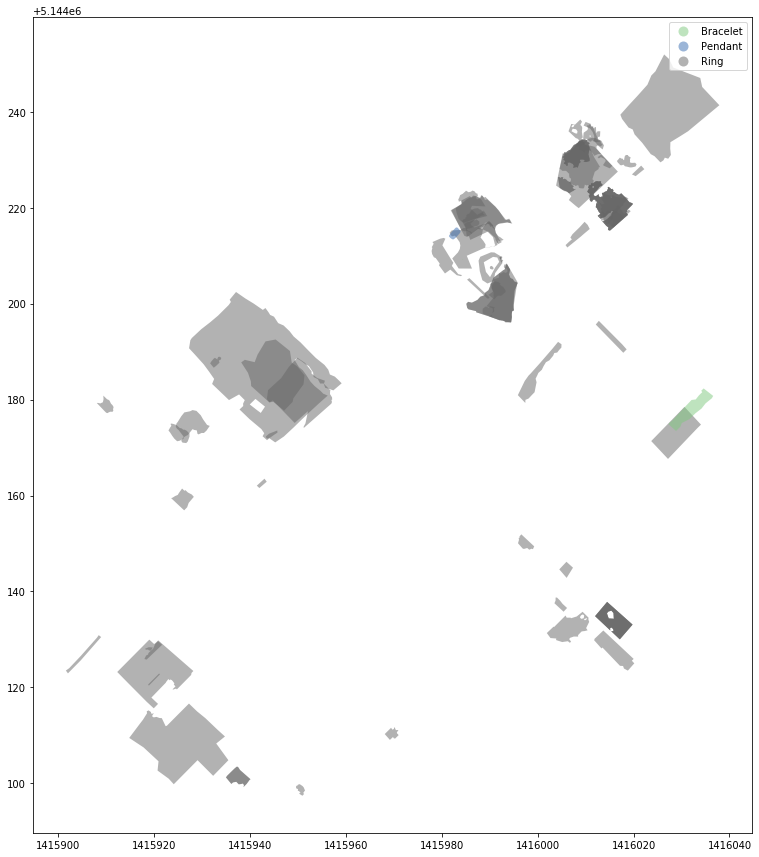

In [0]:
gabii_jewellery2.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [0]:
jewellery_counts = gabii_jewellery2.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)
jewellery_counts.sort_values(by=['Ring','Bracelet','Pendant'], ascending=False)

SF_OBJECT_TYPE,Bracelet,Pendant,Ring
SU,,,
2817,0.0,0.0,4.0
3372,0.0,0.0,4.0
5572,0.0,0.0,4.0
7180,0.0,0.0,4.0
2534,0.0,0.0,3.0
...,...,...,...
8276,0.0,0.0,1.0
3382,1.0,0.0,0.0
3400,1.0,0.0,0.0


In [0]:
gabii_jewellery_counts = gabii_su_poly.merge(jewellery_counts, on='SU')
gabii_jewellery_counts.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Bracelet,Pendant,Ring
0,"POLYGON Z ((1415941.992 5144161.561 62.386, 14...",13,DEP,1376,5.688700,1.566456,0.0,0.0,1.0
1,"POLYGON Z ((1416009.809 5144217.073 61.273, 14...",219,DEP,2226,15.263443,8.156530,0.0,0.0,1.0
2,"POLYGON Z ((1415945.297 5144171.076 63.101, 14...",527,DEP,1032,125.724523,483.921473,0.0,0.0,1.0
3,"POLYGON Z ((1415933.560 5144188.193 63.640, 14...",697,FILL,1110,7.524746,2.720855,0.0,0.0,1.0
4,"POLYGON Z ((1415908.120 5144179.273 65.015, 14...",969,DEP,380,11.285266,5.933908,0.0,0.0,1.0


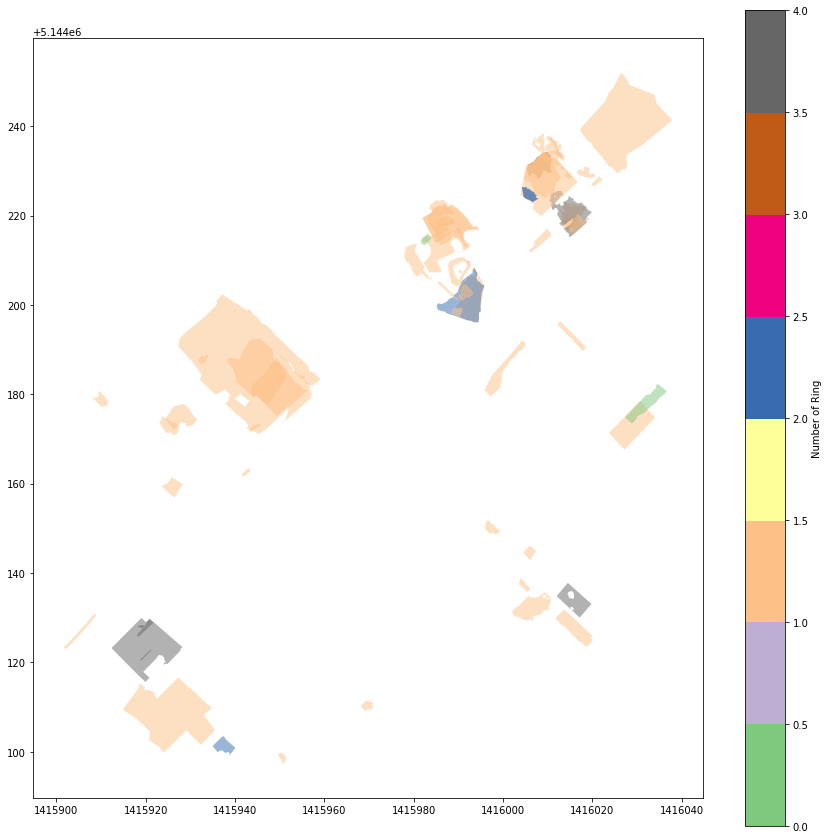

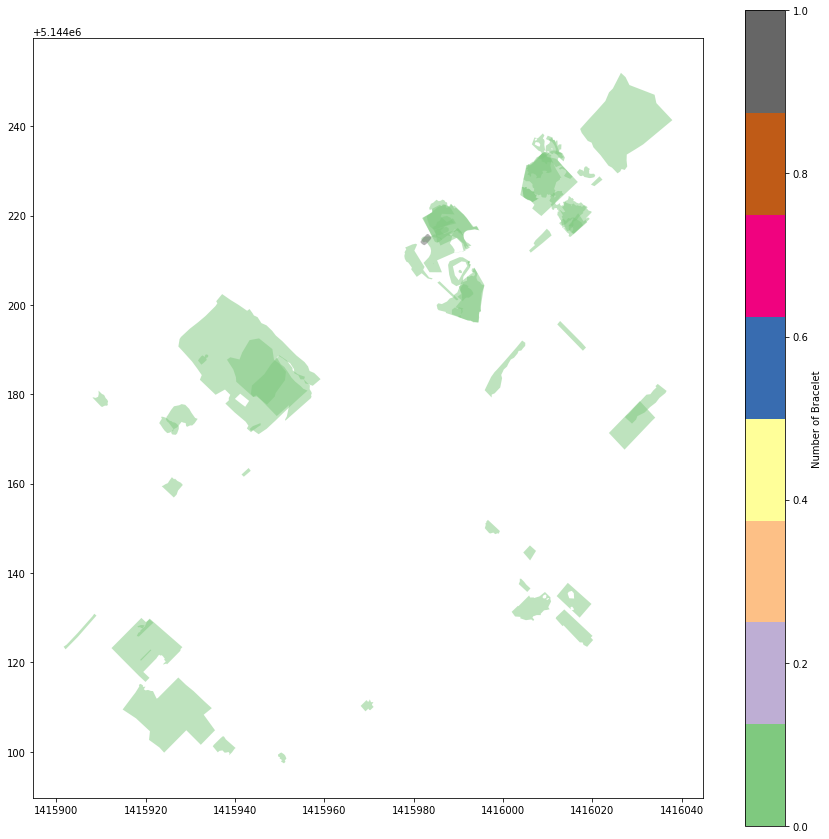

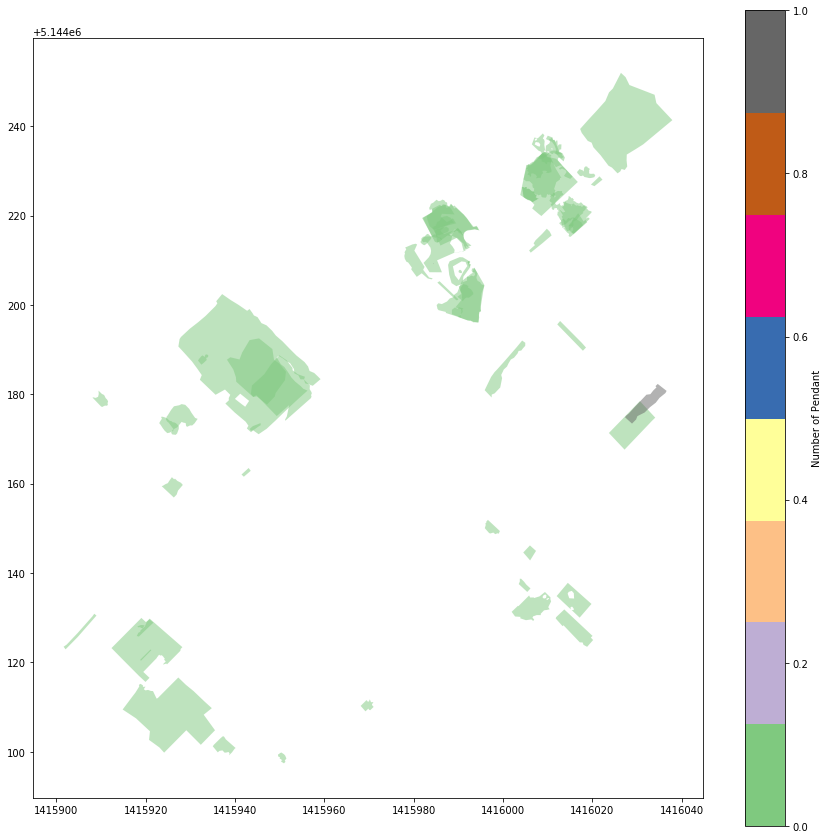

In [0]:
gabii_jewellery_counts.plot(column='Ring', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Ring",'orientation': "vertical"})
gabii_jewellery_counts.plot(column='Pendant', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Bracelet",'orientation': "vertical"})
gabii_jewellery_counts.plot(column='Bracelet', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Pendant",'orientation': "vertical"})

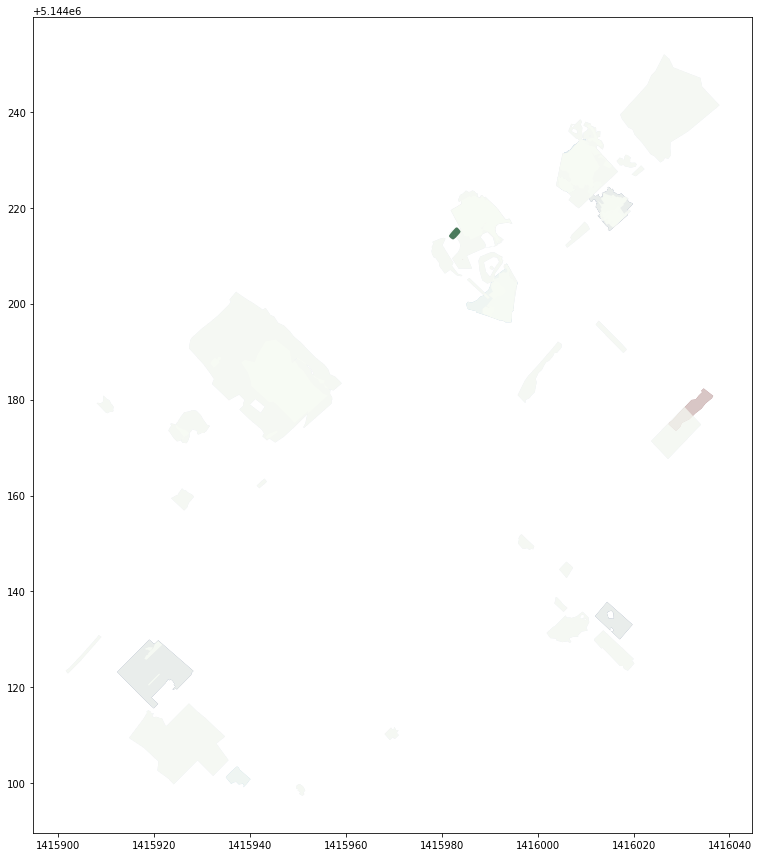

In [0]:
base = gabii_jewellery_counts.plot(column='Ring', cmap='Blues', figsize=(15, 15), alpha=0.7)
gabii_jewellery_counts.plot(ax=base, column='Bracelet', cmap='Reds', alpha=0.7)
gabii_jewellery_counts.plot(ax=base, column='Pendant', cmap='Greens', alpha=0.7);

In [0]:
import matplotlib.pyplot as plt

(1415894.845995, 1416044.6991049997, 5144089.68744, 5144259.67396)

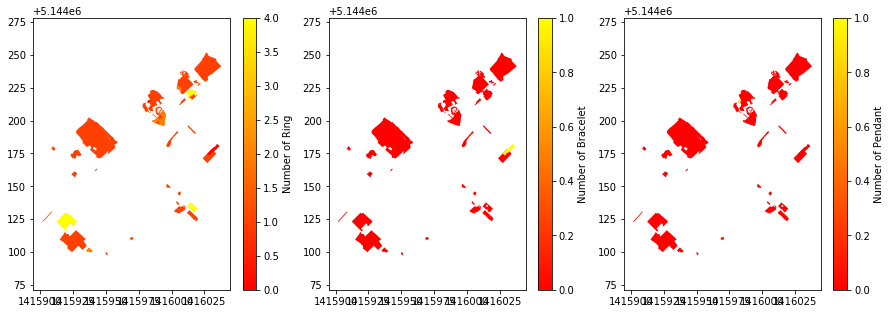

In [0]:
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
gabii_jewellery_counts.plot(column='Ring', cmap='autumn',  ax=axes[0], legend=True, legend_kwds={'label': "Number of Ring",'orientation': "vertical"}).axis('equal')
gabii_jewellery_counts.plot(column='Bracelet', cmap='autumn', ax=axes[1], legend=True, legend_kwds={'label': "Number of Bracelet",'orientation': "vertical"}).axis('equal')
gabii_jewellery_counts.plot(column='Pendant', cmap='autumn',ax=axes[2], legend=True, legend_kwds={'label': "Number of Pendant",'orientation': "vertical"}).axis('equal')

In [0]:
#@title
!apt-get install -qq curl g++ make
#@title
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#@title
import os
os.chdir('spatialindex-src-1.8.5')
#@title
!./configure
#@title
!make
#@title
!make install
#@title
!pip install rtree
#@title
!ldconfig
#Working through the example at http://toblerity.org/rtree/examples.html
#@title
from rtree import index
from rtree.index import Rtree
#@title
p = index.Property()
idx = index.Index(properties=p)
idx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   284k      0  0:00:01  0:00:01 --:--:--  283k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [0]:
!pip install pysal
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

In [0]:
km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(gabii_jewellery_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
km5cls

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

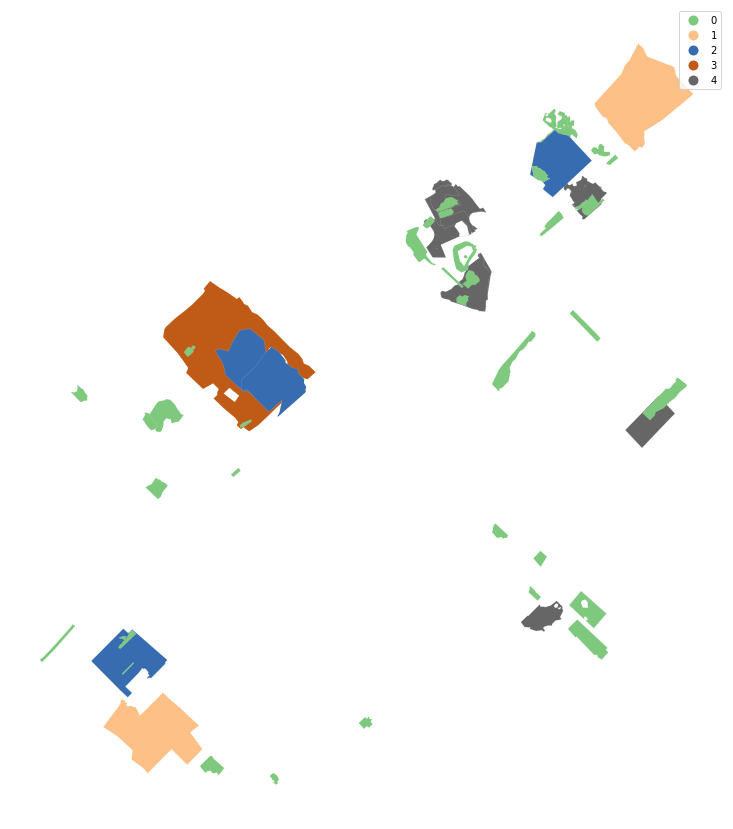

In [0]:
f1, ax = plt.subplots(1, figsize=(15,15))
gabii_jewellery_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)
ax.set_axis_off()
plt.show()

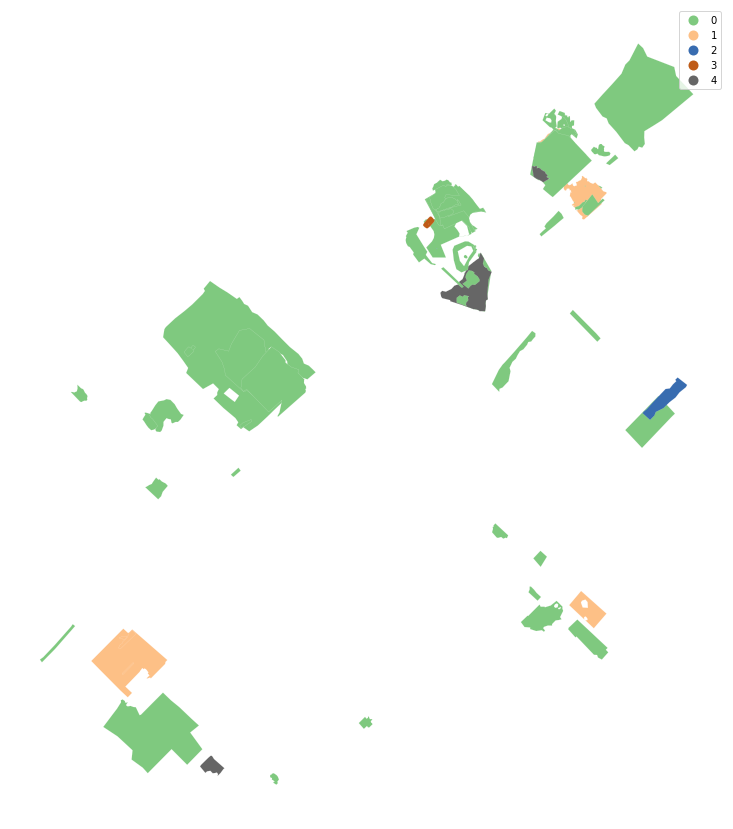

In [0]:
km5 = cluster.KMeans(n_clusters=5)
km5cls2 = km5.fit(gabii_jewellery_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f2, ax = plt.subplots(1, figsize=(15,15))

gabii_jewellery_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

(1415894.8459949996, 1416044.699105, 5144089.68744, 5144259.67396)

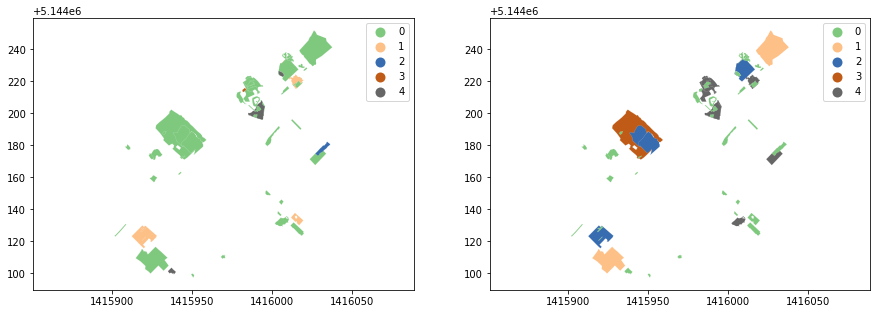

In [0]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))


gabii_jewellery_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[0]).axis('equal')
gabii_jewellery_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[1]).axis('equal')

In [0]:
gabiijewellery_clas = gabii_jewellery_counts.assign(cl=km5cls.labels_)
gabiijewellery_class = gabiijewellery_clas.assign(cl2=km5cls2.labels_)
gabiijewellery_class.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Bracelet,Pendant,Ring,cl,cl2
0,"POLYGON Z ((1415941.992 5144161.561 62.386, 14...",13,DEP,1376,5.688700,1.566456,0.0,0.0,1.0,0,0
1,"POLYGON Z ((1416009.809 5144217.073 61.273, 14...",219,DEP,2226,15.263443,8.156530,0.0,0.0,1.0,0,0
2,"POLYGON Z ((1415945.297 5144171.076 63.101, 14...",527,DEP,1032,125.724523,483.921473,0.0,0.0,1.0,3,0
3,"POLYGON Z ((1415933.560 5144188.193 63.640, 14...",697,FILL,1110,7.524746,2.720855,0.0,0.0,1.0,0,0
4,"POLYGON Z ((1415908.120 5144179.273 65.015, 14...",969,DEP,380,11.285266,5.933908,0.0,0.0,1.0,0,0


(1415894.8459949996, 1416044.699105, 5144089.68744, 5144259.67396)

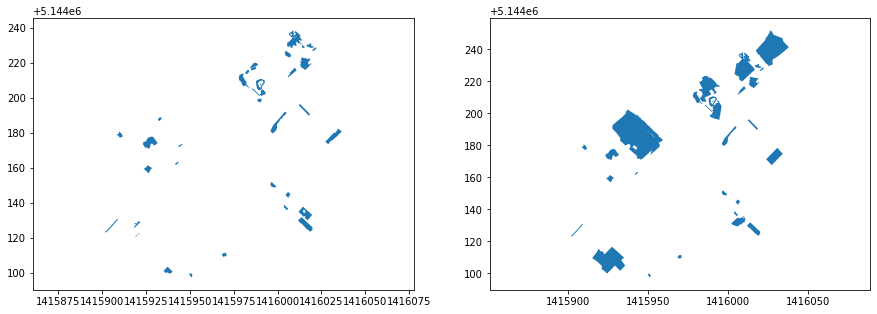

In [0]:
gabiijewellery_class0=gabiijewellery_class.loc[gabiijewellery_class['cl']==0]
gabiijewellery_class0noarea=gabiijewellery_class.loc[gabiijewellery_class['cl2']==0]
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabiijewellery_class0.plot(ax=axes[0], legend=True).axis('equal')
gabiijewellery_class0noarea.plot(ax=axes[1]).axis('equal')

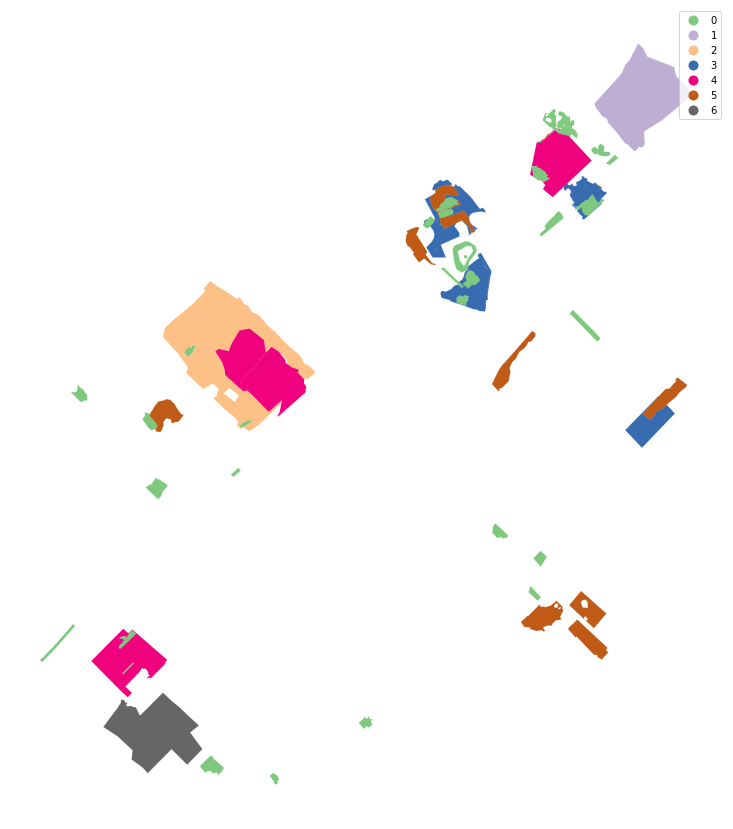

In [0]:
km7 = cluster.KMeans(n_clusters=7)
km7cls3 = km7.fit(gabii_jewellery_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
f3, ax = plt.subplots(1, figsize=(15,15))

gabii_jewellery_counts.assign(cl3=km7cls3.labels_)\
   .plot(column='cl3', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


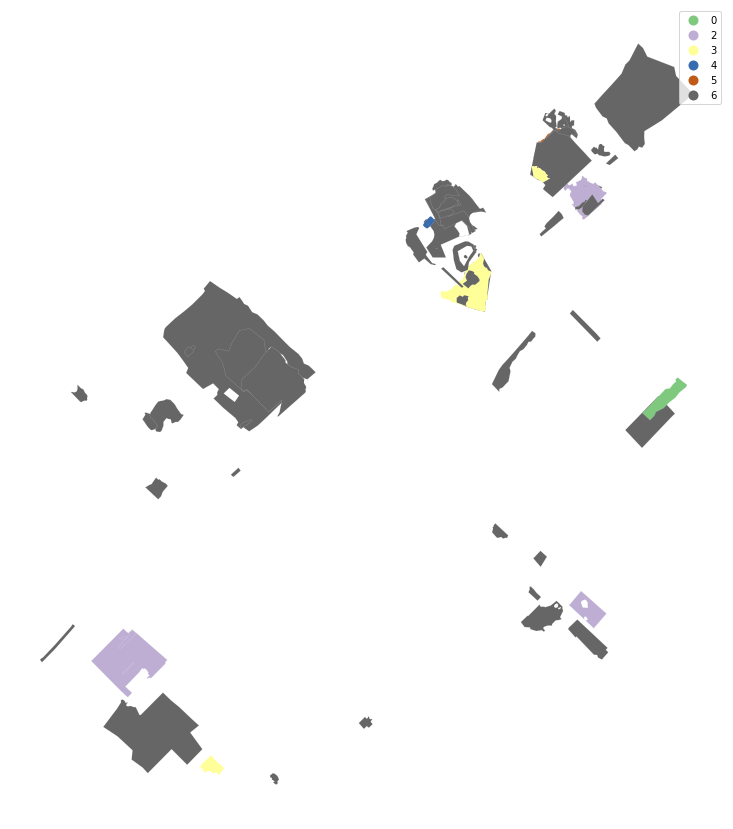

In [0]:
km7 = cluster.KMeans(n_clusters=7)
km7cls4 = km7.fit(gabii_jewellery_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f4, ax = plt.subplots(1, figsize=(15,15))

gabii_jewellery_counts.assign(cl4=km7cls4.labels_)\
   .plot(column='cl4', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [0]:
gabiijewellery_class3=gabiijewellery_class.assign(cl3=km7cls3.labels_)
gabiijewellery_class4=gabiijewellery_class3.assign(cl4=km7cls4.labels_)
gabiijewellery_class4.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Bracelet,Pendant,Ring,cl,cl2,cl3,cl4
0,"POLYGON Z ((1415941.992 5144161.561 62.386, 14...",13,DEP,1376,5.688700,1.566456,0.0,0.0,1.0,0,0,0,6
1,"POLYGON Z ((1416009.809 5144217.073 61.273, 14...",219,DEP,2226,15.263443,8.156530,0.0,0.0,1.0,0,0,0,6
2,"POLYGON Z ((1415945.297 5144171.076 63.101, 14...",527,DEP,1032,125.724523,483.921473,0.0,0.0,1.0,3,0,2,6
3,"POLYGON Z ((1415933.560 5144188.193 63.640, 14...",697,FILL,1110,7.524746,2.720855,0.0,0.0,1.0,0,0,0,6
4,"POLYGON Z ((1415908.120 5144179.273 65.015, 14...",969,DEP,380,11.285266,5.933908,0.0,0.0,1.0,0,0,0,6


Text(0.5, 1, '7 clusters - no area')

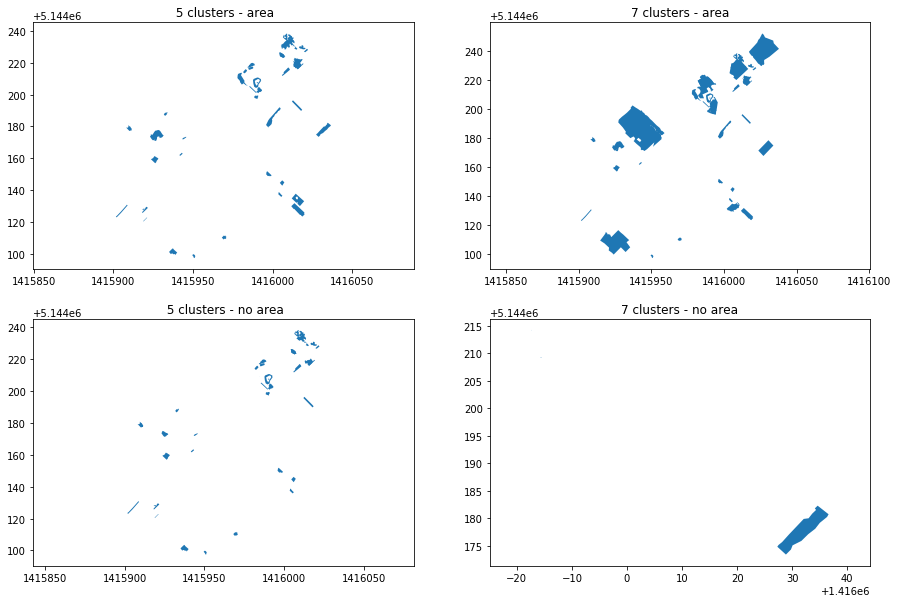

In [0]:
gabiijewellery_class0=gabiijewellery_class4.loc[gabiijewellery_class4['cl']==0]
gabiijewellery_class0noarea=gabiijewellery_class4.loc[gabiijewellery_class4['cl2']==0]
gabiijewellery_k7_class0=gabiijewellery_class4.loc[gabiijewellery_class4['cl3']==0]
gabiijewellery_k7_class0noarea=gabiijewellery_class4.loc[gabiijewellery_class4['cl4']==0]
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiijewellery_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title(' 5 clusters - area')
gabiijewellery_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiijewellery_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiijewellery_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

Text(0.5, 1, '7 clusters - no area')

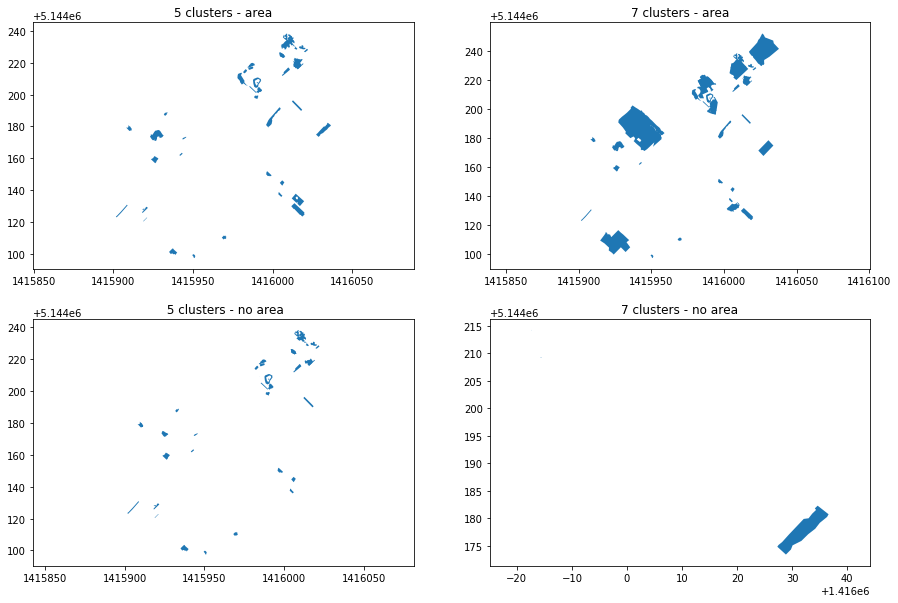

In [0]:
gabiijewellery_class3=gabiijewellery_class4.loc[gabiijewellery_class4['cl']==3]
gabiijewellery_class3noarea=gabiijewellery_class4.loc[gabiijewellery_class4['cl2']==3]
gabiijewellery_k7_class3=gabiijewellery_class4.loc[gabiijewellery_class4['cl3']==3]
gabiijewellery_k7_class3noarea=gabiijewellery_class4.loc[gabiijewellery_class4['cl4']==3]


fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiijewellery_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('5 clusters - area')
gabiijewellery_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiijewellery_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiijewellery_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

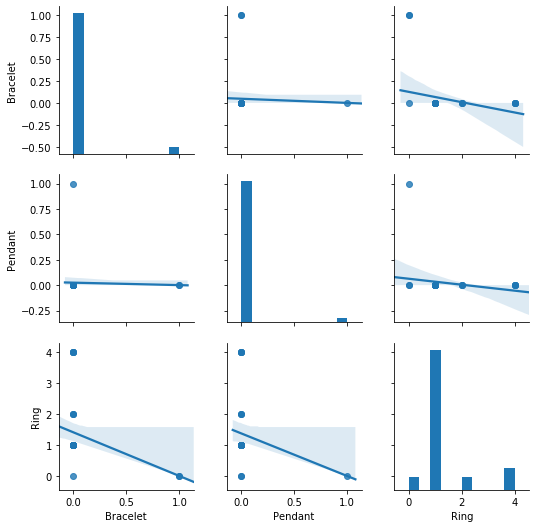

In [0]:
sns.pairplot(gabiijewellery_k7_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()

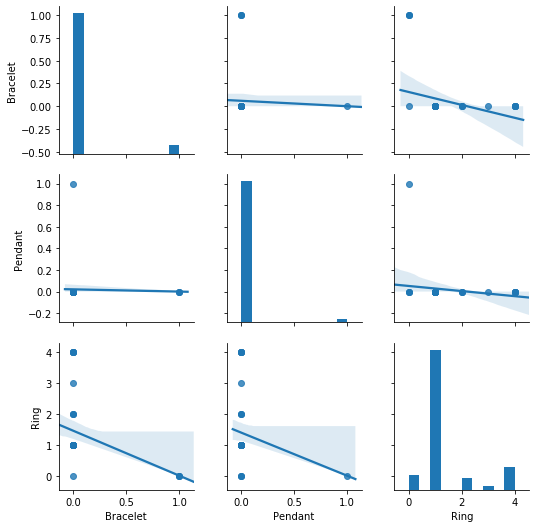

In [0]:
sns.pairplot(gabiijewellery_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()